# **CF59FL**

In [3]:
import pickle
from golgi_diff_adv_functions import *
from ER_diff_adv_functions import *
from golgi_diff_adv_functions import *
from df_functions import *
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## **ER quantification**

In [ ]:
sheet_name_golgi='CD59 FL Golgi_Set 1 (2)'
sheet_name_ER='CD59FL ER Exit'

plt.close('all')
###############  IMPORTING DATAFRAME   ###############
df_golgi = pd.read_excel(r'Z:/Parisa/Quantification/Nathaly/Golgi Exit For Nathaly 1D and 5D/Golgi Arrival and Exit_CD59FL_1 Day_60 Cells_Parisa KHALILIAN_28112022.xlsx', sheet_name=sheet_name_golgi)
df_golgi.dropna(axis=0,inplace=True)

In [ ]:
###############  SPLITTING MFI AND TIME   ###############
step=0.705333333-0.352666667
golgi_time=df_golgi.iloc[:, 0]
golgi_MFI=df_golgi.iloc[:, 1:len(df_golgi.columns)-1]

### **Current values**

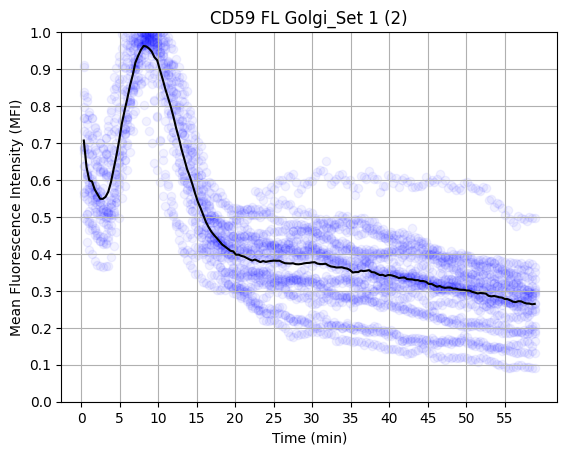

In [ ]:
plot_ind_protein(golgi_time,golgi_MFI, sheet_name_golgi)

### **Filtered values**

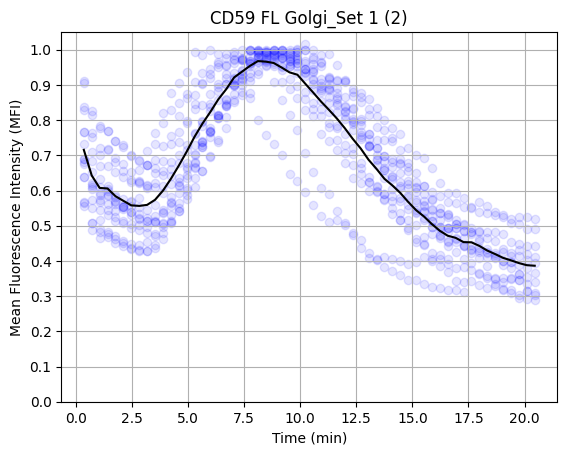

In [ ]:
###############  FILTERING DATA   ###############
(Golgi_time_array,Golgi_array,Golgi_xlim_time,idx_golgi)=filtering_Golgi(golgi_time,golgi_MFI,int((5-10*step)/step),int((25-8*step)/step),0.7)
plot_filtered_protein_Golgi(Golgi_time_array,Golgi_array,step,sheet_name_golgi)


In [ ]:
idx_golgi

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 17, 18]

### **Estimating diffusion-advection**

In [ ]:
###############  FITTING MODELLING GOLGI  ###############
df_solutions_RE= pd.DataFrame(columns=['System','Organelle','Cell','D(min-1)','V(min-1)','r(min-1)','kL(min-1)',
                                         'kR(min-1)', 'dt(min)', 'Dt(min)','Error'])
cell=0
for protein_mfi in Golgi_array:
    #print(column)
    desired_output = protein_mfi
    best_specimen, best_specimen_error = start_ER(1000, desired_output, 10, 0.3, False)
    # [D,V,r,kL, kR, dt, Dt]
    df2 = pd.DataFrame([{'System':'CD59FL','Organelle':'ER','Cell':idx_golgi[cell],'D(min-1)':best_specimen[0],'V(min-1)':best_specimen[1],
                             'r(min-1)':best_specimen[2],'kL(min-1)':best_specimen[3],
                             'kR(min-1)':best_specimen[4],'dt(min)':best_specimen[5],
                             'Dt(min)':best_specimen[6], 'Error':best_specimen_error}])
    df_solutions_RE = pd.concat([df_solutions_RE, df2], axis=0, ignore_index=True)
    cell=cell+1


The best solution is:  [0.41000000000000003, 0.01, 0.0, 0.0, 0.01, 0.4375, 26.6875]
Its error is:  1.0381941086583057
The best solution is:  [0.41000000000000003, 0.01, 0.0, 0.0, 0.06, 0.4375, 26.6875]
Its error is:  1.2155187932199343
The best solution is:  [0.41000000000000003, 0.01, 0.0, 0.0, 0.07, 0.4375, 26.6875]
Its error is:  1.3969696117160568
The best solution is:  [0.31000000000000005, 0.01, 0.0, 0.0, 0.03, 0.4375, 30.1875]
Its error is:  1.307146404937221
The best solution is:  [0.41000000000000003, 0.01, 0.0, 0.0, 0.02, 0.4375, 25.8125]
Its error is:  1.2972606022423958
The best solution is:  [0.41000000000000003, 0.01, 0.0, 0.0, 0.02, 0.4375, 24.9375]
Its error is:  1.371646694825904
The best solution is:  [0.21000000000000002, 0.01, 0.0, 0.0, 0.13, 0.4375, 26.6875]
Its error is:  1.4395121717595156
The best solution is:  [0.41000000000000003, 0.01, 0.0, 0.0, 0.03, 0.4375, 25.8125]
Its error is:  1.1801977780367081
The best solution is:  [0.41000000000000003, 0.01, 0.0, 0.

In [ ]:
flux_ER = dict.fromkeys(df_solutions_RE['Cell'], [])

for cell in df_solutions_RE['Cell']: 
    #print(cell)
    difussion_coef_ER = df_solutions_RE[df_solutions_RE['Cell']==cell]['D(min-1)']
    #print(difussion_coef_ER)
    flux = np.diff(Golgi_array[cell-1]) * -1 * float(difussion_coef_ER)
    flux_ER[cell] = flux

## **Golgi quantification**

In [ ]:
sheet_name_golgi='CD59 FL Golgi_Set 1 (2)'
sheet_name_ER='CD59FL ER Exit'

plt.close('all')
###############  IMPORTING DATAFRAME   ###############
df_golgi = pd.read_excel(r'Z:/Parisa/Quantification/Nathaly/Golgi Exit For Nathaly 1D and 5D/Golgi Arrival and Exit_CD59FL_1 Day_60 Cells_Parisa KHALILIAN_28112022.xlsx', sheet_name=sheet_name_golgi)
df_golgi.dropna(axis=0,inplace=True)

In [ ]:
###############  SPLITTING MFI AND TIME   ###############
golgi_time=df_golgi.iloc[:, 0]
golgi_MFI=df_golgi.iloc[:, 1:len(df_golgi.columns)-1]
step=0.705333333-0.352666667

### **Current values**

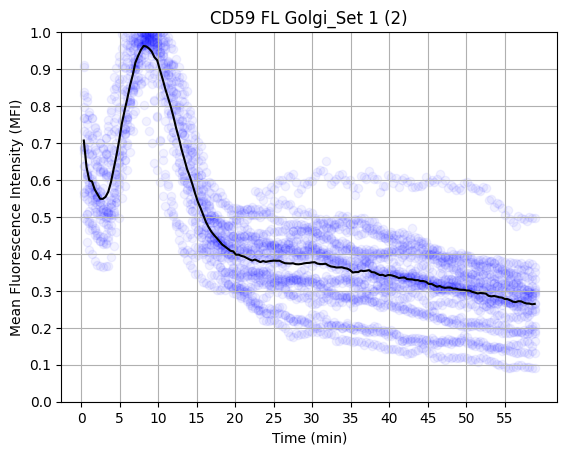

In [ ]:
plot_ind_protein(golgi_time,golgi_MFI, sheet_name_golgi)


### **Filtered values**

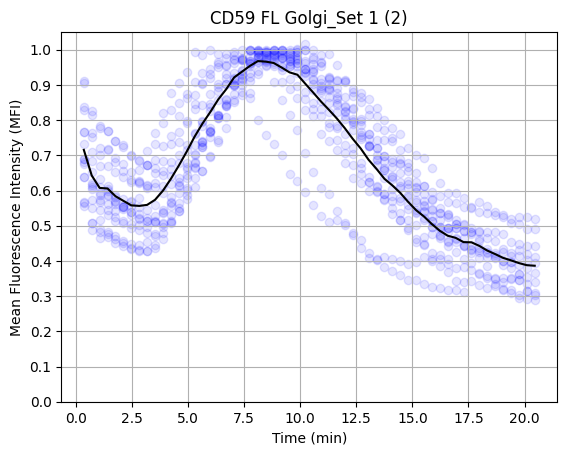

In [ ]:
###############  FILTERING DATA   ###############
(Golgi_time_array,Golgi_array,Golgi_xlim_time,idx_golgi)=filtering_Golgi(golgi_time,golgi_MFI,int((5-10*step)/step),int((25-8*step)/step),0.7)
plot_filtered_protein_Golgi(Golgi_time_array,Golgi_array,step,sheet_name_golgi)


In [ ]:
###############  FITTING MODELLING GOLGI  ###############
df_solutions_RE= pd.DataFrame(columns=['System','Organelle','Cell','D(min-1)','V(min-1)','r(min-1)','kL(min-1)',
                                         'kR(min-1)', 'dt(min)', 'Dt(min)','Error'])
cell=0
for protein_mfi in Golgi_array:
    #print(column)
    desired_output = protein_mfi
    best_specimen, best_specimen_error = start_Golgi(1000, desired_output, 10, 0.3, False, flux_ER)
    # [D,V,r,kL, kR, dt, Dt]
    df2 = pd.DataFrame([{'System':'CD59FL','Organelle':'ER','Cell':idx_golgi[cell],'D(min-1)':best_specimen[0],'V(min-1)':best_specimen[1],
                             'r(min-1)':best_specimen[2],'kL(min-1)':best_specimen[3],
                             'kR(min-1)':best_specimen[4],'dt(min)':best_specimen[5],
                             'Dt(min)':best_specimen[6], 'Error':best_specimen_error}])
    df_solutions_RE = pd.concat([df_solutions_RE, df2], axis=0, ignore_index=True)
    cell=cell+1
